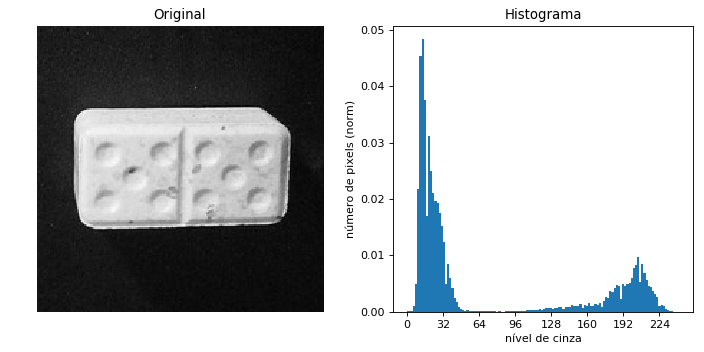

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from scipy import ndimage

# Limiarização automática: escolhe limiar igual a média
def limiarizacao_media(imagem):
    # Calcula a média dos pixels da imagem
    media = np.mean(imagem)
    
    # limiarização, limiar = media
    img_bin = ((imagem>media)*255).astype("uint8")
    return img_bin, media

def limiarizacao_media_iter(imagem):
    # Calcula a média dos pixels da imagem
    media_inicial = np.mean(imagem)

    # Calcula limiar
    while True:
        media_1 = np.mean(imagem[imagem< media_inicial])        
        media_2 = np.mean(imagem[imagem>=media_inicial])
        
        media_nova = (media_1+media_2)/2
        if media_nova.astype("uint8")==media_inicial.astype("uint8"):
            break
        else:
            media_inicial = media_nova

    # limiarização, limiar = media
    img_bin = ((imagem>media_nova)*255).astype("uint8")
    return img_bin, media_nova
    
# Leitura Imagem
img1 = imread('3303_lg.tiff', as_grey=True)
img1 = (img1 * 255).round().astype(np.uint8)

# parâmetros para gráfico do histograma
hist_args = {'title':'Histograma', 
             'xlabel':'nível de cinza',
             'ylabel':'número de pixels (norm)',
             'xticks':[0, 32, 64, 96, 128, 160, 192, 224, 256]}

def plots(p1, p2, p3):
    fig = plt.figure(figsize=(9,3), dpi=80)
    a = fig.add_subplot(1,3,1)
    a.axis('off')
    plt.imshow(p1, cmap=plt.cm.gray)
    a.set_title('Original')

    a = fig.add_subplot(1,3,2)
    a.axis('off')
    plt.imshow(p2, cmap=plt.cm.gray)
    a.set_title('Limiarização')

    a = fig.add_subplot(1,3,3, **hist_args)
    a.hist(p1.ravel(), bins=128, normed=True, edgecolor='none', histtype='stepfilled')
    a.axvline(x=p3,color='orange')
    plt.tight_layout()

    plt.show()

fig = plt.figure(figsize=(9,4.5), dpi=80)
# mostra imagem
a = fig.add_subplot(1,2,1)
a.imshow(img1, cmap=plt.cm.gray)
a.axis('off')
a.set_title('Original')

# mostra histograma
a = fig.add_subplot(1,2,2, **hist_args)
a.hist(img1.ravel(), bins=128, normed=True, edgecolor='none',histtype='stepfilled')
plt.tight_layout()
plt.show()

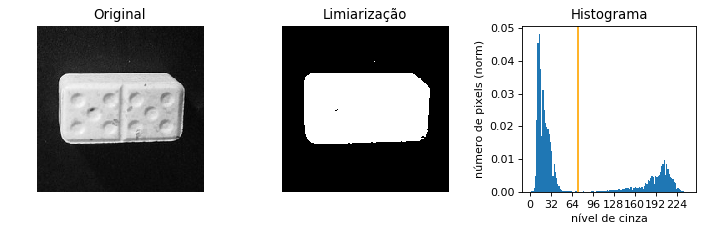

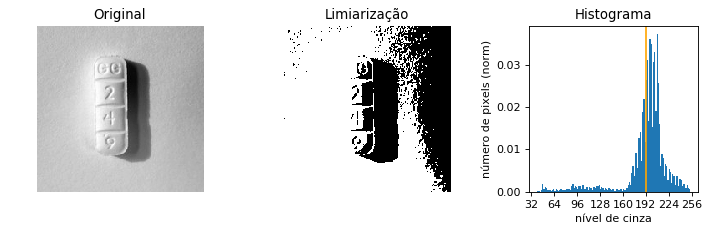

In [12]:
# Leitura imagem 2
img2 = imread('3665_lg.tiff', as_grey=True)
img2 = (img2 * 255).round().astype(np.uint8)

# Limiarização das imagens
bin1, media1 = limiarizacao_media(img1)
bin2, media2 = limiarizacao_media(img2)

# Exibição 
plots(img1, bin1, media1)
plots(img2, bin2, media2)

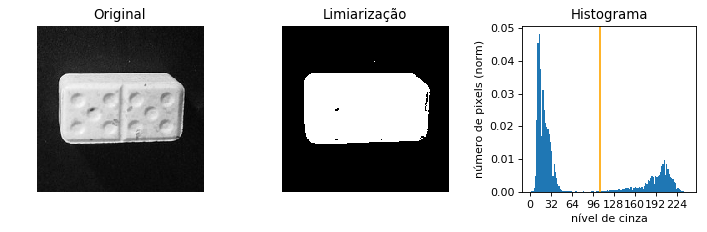

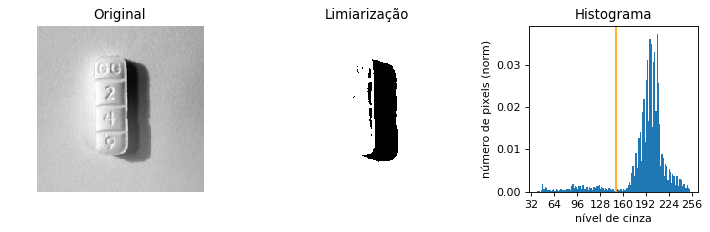

In [24]:
# Limiarização das imagens
bin1, media_iter1 = limiarizacao_media_iter(img1)
bin2, media_iter2 = limiarizacao_media_iter(img2)

# Exibição 
plots(img1, bin1, media_iter1)
plots(img2, bin2, media_iter2)